<a href="https://colab.research.google.com/github/nsalazard/EFM-analisis-de-datos-/blob/main/EFM_S2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#R_0

In [ ]:
import gspread
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt 
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import norm
import matplotlib.colors as mcolors
from google.colab import auth
from oauth2client.client import GoogleCredentials
from scipy.interpolate import make_interp_spline, BSpline  #lo uso para sacar curvas suaves

auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())

wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1JtcmI-pusADI0tWl0X0yxQCPOjhKlacSxAWT1Bc3cOg/edit#gid=903312660')
worksheet=wb.worksheet('Ro')
rows = worksheet.get_all_values()
df=pd.DataFrame(rows)
titles=pd.DataFrame(rows)
df.columns = df.iloc[0]# Esto pone las columnas del dataframe con los mismos nombres que la primera fila del sheets
titles=titles.iloc[0:1]
df = df.iloc[1:]#esto se salta la primera fila que es los titulos de las columnas porque ya nombramos a las columnas en la linea anterior y se repetirian
df.head()

,IF[mA],VF[mV],R,Incertidumbre R,,,,,,,
1,160.1,46.9,0.293,4.04E-04,,,,,,,
2,151.2,43.6,0.288,4.26E-04,,,,,,,
3,140.6,39.9,0.284,4.57E-04,,,,,,,
4,128.9,35.9,0.279,4.96E-04,,,,,,,
5,118.8,32.6,0.274,5.36E-04,,,,,,,


In [ ]:
nombres=df.columns[0:4]
for name in nombres:
  df[name]= pd.to_numeric(df[name])

In [ ]:
df.columns[0:4]

Index(['IF[mA]', 'VF[mV]', 'R', 'Incertidumbre R'], dtype='object', name=0)

In [ ]:
def func(x,a,b):
  return a*x + b

Text(0.5, 1.0, 'Resistencia a temperatura ambiente del filamento, Ro')

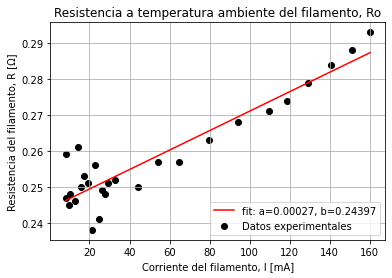

In [ ]:
valx1=df.loc[:30, "IF[mA]"]
valy1=df.loc[:30, "R"]
x1=valx1.values
y1=valy1.values

plt.scatter(x1, y1,label="Datos experimentales",color="black")

popt, pcov = curve_fit(func, x1, y1)
plt.plot(x1, func(x1, *popt), 'r-', label='fit: a=%5.5f, b=%5.5f' % tuple(popt))

#plt.xlim([0, 165])
#plt.ylim([0, 1])

plt.grid(b=True,which="both")
plt.legend(loc="lower right")
plt.xlabel("Corriente del filamento, I [mA]")
plt.ylabel("Resistencia del filamento, R [Ω]")
plt.title("Resistencia a temperatura ambiente del filamento, Ro")

In [ ]:
print(popt)


[0.00027078 0.24397071]


#Puntos máximo

In [ ]:
worksheet1=wb.worksheet('Espectro')
rows1 = worksheet1.get_all_values()
df1=pd.DataFrame(rows1)
titles1=pd.DataFrame(rows1)
df1.columns = df1.iloc[0]# Esto pone las columnas del dataframe con los mismos nombres que la primera fila del sheets
titles=titles.iloc[0:1]
df1 = df1.iloc[1:]#esto se salta la primera fila que es los titulos de las columnas porque ya nombramos a las columnas en la linea anterior y se repetirian
df1.head()

,λ [± 2 nm],IL [u.a]
1,200,12.6
2,210,11.6
3,220,10.9
4,230,10.4
5,240,10.2


In [ ]:
nombres1=df1.columns.tolist()
for name in nombres1:
  df1[name]= pd.to_numeric(df1[name])

Text(0.5, 1.0, 'Expectro de emisión del filamento de tungsteno')

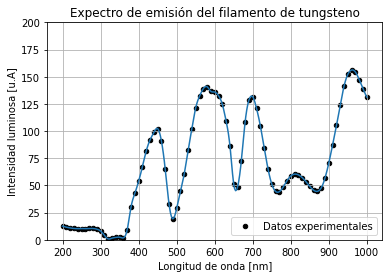

In [ ]:
valx1=df1.loc[:82, "λ  [± 2 nm]"]
valy1=df1.loc[:82, "IL [u.a]"]
x1=valx1.values
y1=valy1.values
plt.ylim([0, 200])

plt.scatter(x1, y1,s=20,label="Datos experimentales",color="black")

#Curva suave
xnew = np.linspace(x1.min(),x1.max(),300) #300 represents number of points to make between R.min and R.max
spl = make_interp_spline(x1, y1, k=3) #BSpline object
power_smooth = spl(xnew)
plt.plot(xnew,power_smooth)

#plt.loglog(basex=10,basey=10)
plt.grid(b=True,which="both")
plt.legend(loc="lower right")
plt.xlabel("Longitud de onda [nm]")
plt.ylabel("Intensidad luminosa [u.A]")
plt.title("Expectro de emisión del filamento de tungsteno")

calculos
k = 1.38*10^(-23)
h = 6.626*10^(-34)
hc = 1.98644586*10^(-25)
nm -> m *10^(-9)



In [ ]:
tlist = {450,580,960}
for x in tlist:
  t = 1.98644586*10**(-25)/(1.38*10**(-23)*x*10**(-9))
  print(x, t)


960 14994.307518115946
450 31987.856038647344
580 24818.16416791605


In [ ]:
#960
(16000-14994)/14994*100

6.709350406829398

In [ ]:
#580
(24818-24109)/24818*100

2.856797485695866

In [ ]:
#450
(33519-31987)/31987 *100

4.78944571232063

In [ ]:
tlist = {16005,24109,33824}
for x in tlist:
  t = 1.98644586*10**(-25)/(1.38*10**(-23)*x*10**(-9))
  print(x, t)

33824 425.57164195220275
24109 597.0606502713221
16005 899.3773956508156


In [ ]:
(960-899)/960*100

6.354166666666666

In [ ]:
(450-425)/425*100

5.88235294117647

In [ ]:
(597-580)/580*100

2.9310344827586206